# Overlap capacity: artificial vs real


In [1]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [2]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = '95c0ca0cdca3f00e55f0e46dd9a8b8c1f492d94e'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

In [3]:
from network import Protocol, BCPNNFast, NetworkManager
from analysis_functions import calculate_recall_success_sequences
from connectivity_functions import create_artificial_manager 

## Artificial example

In [4]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

# Recall 
n = 10
T_cue = 0.100
T_recall = 10.0

# Artificial matrix
beta = False
value = 1
inhibition = -0.1
extension = 6
decay_factor = 0.1
sequence_decay = 0.1
tau_z_pre = 0.150

# Sequence structure
overlap = 3
number_of_sequences = 2
half_width = 4

overlap_vector = np.arange(1, 11, 1, dtype=int)
total_success_tau_z = np.zeros(overlap_vector.size)

In [5]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)

    # Build chain protocol
    chain_protocol = Protocol()
    units_to_overload = [i for i in range(overlap)]
    sequences = chain_protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)

    manager = create_artificial_manager(hypercolumns, minicolumns, sequences, value=value,
                                        inhibition=inhibition,
                                        extension=extension, decay_factor=decay_factor,
                                        sequence_decay=sequence_decay,
                                        dt=dt, BCPNNFast=BCPNNFast, NetworkManager=NetworkManager, ampa=True,
                                        beta=beta)

    manager.nn.tau_z_pre = tau_z_pre

    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    total_success_tau_z[overlap_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)
('overlap, index', 9)


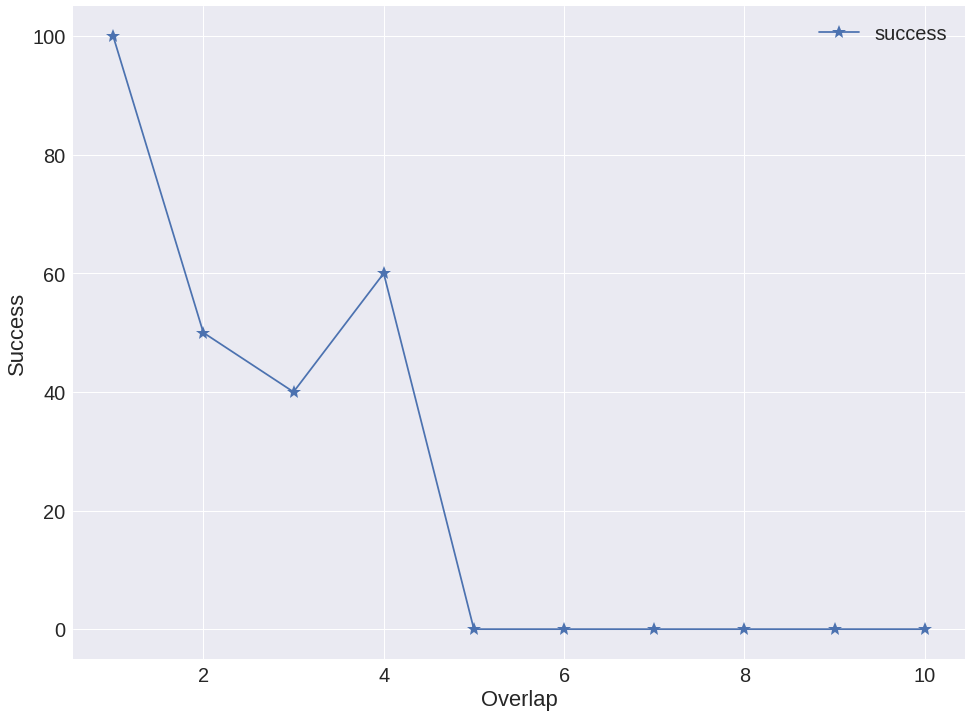

In [6]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(overlap_vector, total_success_tau_z, '*-', markersize=15, label='success')

ax.set_ylabel('Success')
ax.set_xlabel('Overlap')
ax.set_ylim([-5, 105])
ax.legend();

## Real example

In [7]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

values_to_save = ['o']

# Recall
n = 10
T_cue = 0.100
T_recall = 10.0

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre = 0.150
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
overlap = 3
number_of_sequences = 2
half_width = 4
units_to_overload = [i for i in range(overlap)]

overlap_vector = np.arange(1, 11, 1, dtype=int)
total_success_tau_z_real = np.zeros(overlap_vector.size)

In [8]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)

    protocol = Protocol()
    units_to_overload = [i for i in range(overlap)]
    sequences = protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
    protocol.cross_protocol(sequences, training_time=training_time,
                            inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    manager.run_network_protocol(protocol=protocol, verbose=False)

    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    total_success_tau_z_real[overlap_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)
('overlap, index', 4)
('overlap, index', 5)
('overlap, index', 6)
('overlap, index', 7)
('overlap, index', 8)
('overlap, index', 9)


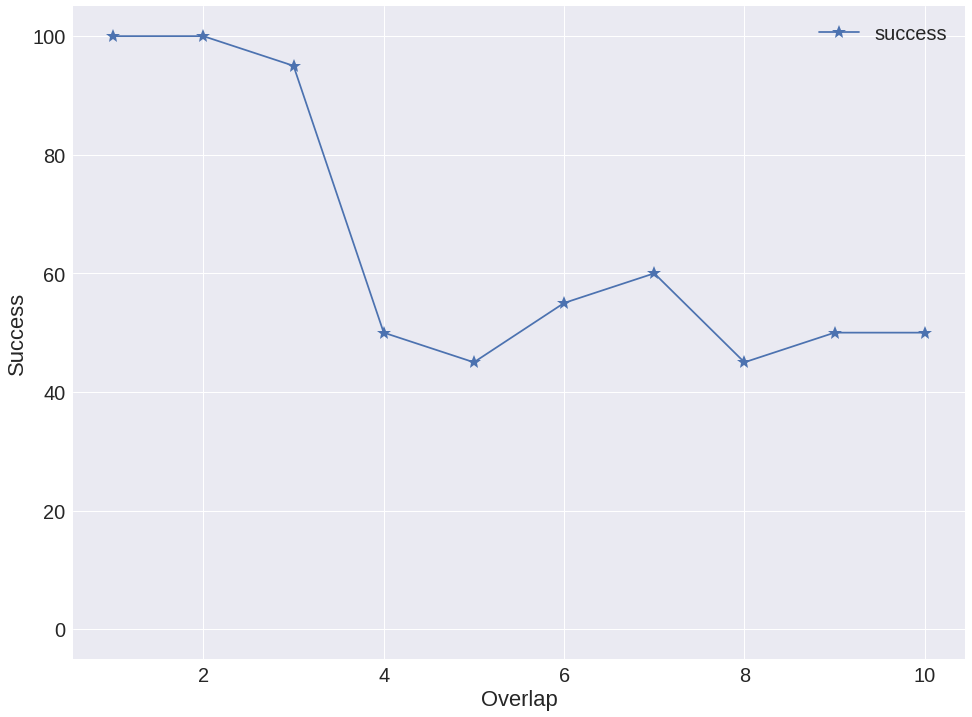

In [9]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(overlap_vector, total_success_tau_z_real, '*-', markersize=15, label='success')

ax.set_ylabel('Success')
ax.set_xlabel('Overlap')
ax.set_ylim([-5, 105])
ax.legend();

#### Extended

In [11]:
# Patterns parameters
hypercolumns = 4
minicolumns = 50

dt = 0.001

values_to_save = ['o']

# Recall
n = 10
T_cue = 0.100
T_recall = 10.0

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
tau_z_pre = 0.150
nn = BCPNNFast(hypercolumns, minicolumns, tau_z_pre=tau_z_pre)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
overlap = 3
number_of_sequences = 2
half_width = 4
units_to_overload = [i for i in range(overlap)]

overlap_vector = np.arange(10, 20, 3, dtype=int)
total_success_tau_z_real_ext = np.zeros(overlap_vector.size)

In [12]:
for overlap_index, overlap in enumerate(overlap_vector):
    print('overlap, index', overlap_index)

    protocol = Protocol()
    units_to_overload = [i for i in range(overlap)]
    sequences = protocol.create_overload_chain(number_of_sequences, half_width, units_to_overload)
    protocol.cross_protocol(sequences, training_time=training_time,
                            inter_sequence_interval=inter_sequence_interval, epochs=epochs)

    # Train
    manager.run_network_protocol(protocol=protocol, verbose=False)

    successes = calculate_recall_success_sequences(manager, T_recall=T_recall, T_cue=T_cue, n=n, 
                                                   sequences=sequences)
    total_success_tau_z_real_ext[overlap_index] = np.mean(successes)

('overlap, index', 0)
('overlap, index', 1)
('overlap, index', 2)
('overlap, index', 3)


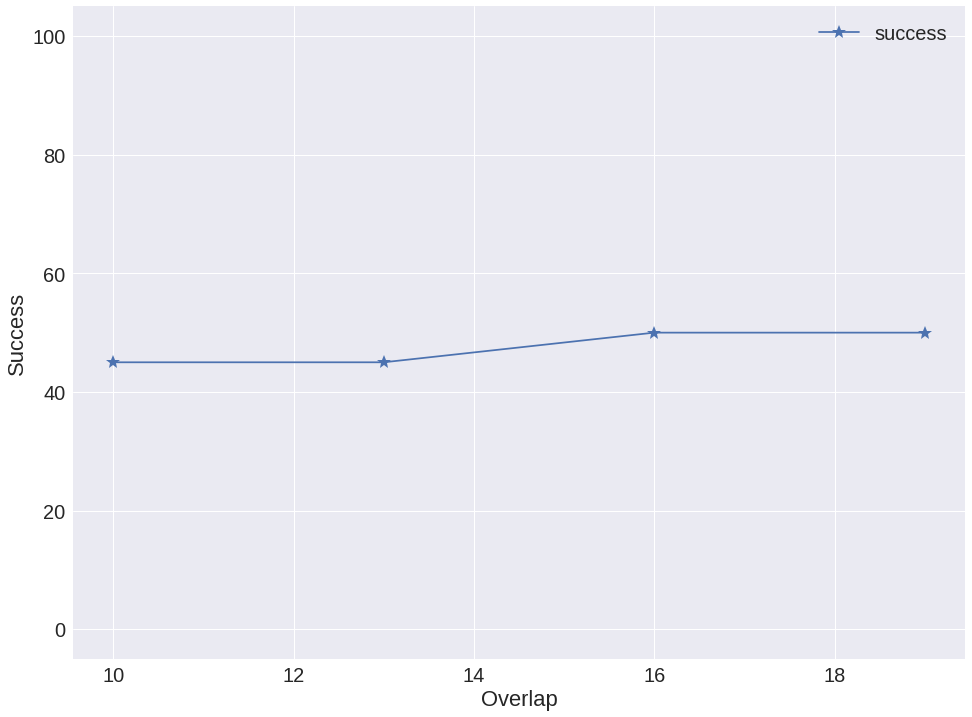

In [13]:
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
ax.plot(overlap_vector, total_success_tau_z_real_ext, '*-', markersize=15, label='success')

ax.set_ylabel('Success')
ax.set_xlabel('Overlap')
ax.set_ylim([-5, 105])
ax.legend();

#### Git machinery

In [10]:
if run_old_version:
    subprocess.call(['git', 'checkout', 'master'])